<a href="https://colab.research.google.com/github/eduardovitor22/Banner/blob/main/Analisando_a_viol%C3%AAncia_no_Rio_de_Janeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisando a Violência no Rio de Janeiro

Sabemos que a violência assola o Brasil com índices altissímos anualmente, trazendo um mal histórico para um dos estados mais turísticos do país.

Nessa análise vamos focar no estado do Rio de Janeiro, que tem a má fama de ser um dos estados mais violentos do Brasil!

## Obtenção dos Dados

Esse arquivo pode ser encontrado no [ISP dados](http://www.ispdados.rj.gov.br/estatistica.html), que faz parte de uma rede de [Dados abertos](http://www.dados.gov.br/), um portal do governo que compartilha informações sobre o administração pública.

In [ ]:
# importando as bibliotecas
import pandas as pd
import matplotlib as plt
import seaborn as sns 

### Importando os dados

Importe os dados, usando `df = pd.read_csv("endereço_do_csv")`

In [ ]:
df_v = pd.read_csv("/content/violencia_rio.csv")

## Análise Inicial dos Dados

Iniciaremos uma análise exploratória com a finalidade de obtermos uma consciência situacional das informações computadas no ```dataset```.

Descreva e execute as seguintes etapas:

* Qual o tamanho do seu DataFrame (`shape`)
* Extrair e imprimir os nomes das colunas (`columns`)
* Quais os tipos das variáveis (`dtypes`)
* Visualizar as 5 primeiras linhas (`head`)
* Identifique a porcentagem de valores ausentes das colunas

In [ ]:
# imprimindo o volume de dados do dataframe
print('Entradas:\t {}'.format(df_v.shape[0]))
print('Variáveis:\t {}'.format(df_v.shape[1]))

Entradas:	 344
Variáveis:	 56


In [ ]:
# imprimindo nomes atríbuidos as colunas

df_v.columns

Index(['vano', 'mes', 'hom_doloso', 'lesao_corp_morte', 'latrocinio',
       'hom_por_interv_policial', 'tentat_hom', 'lesao_corp_dolosa', 'estupro',
       'hom_culposo', 'lesao_corp_culposa', 'roubo_comercio',
       'roubo_residencia', 'roubo_veiculo', 'roubo_carga', 'roubo_transeunte',
       'roubo_em_coletivo', 'roubo_banco', 'roubo_cx_eletronico',
       'roubo_celular', 'roubo_conducao_saque', 'roubo_apos_saque',
       'roubo_bicicleta', 'outros_roubos', 'total_roubos', 'furto_veiculos',
       'furto_transeunte', 'furto_coletivo', 'furto_celular',
       'furto_bicicleta', 'outros_furtos', 'total_furtos', 'sequestro',
       'extorsao', 'sequestro_relampago', 'estelionato', 'apreensao_drogas',
       'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor',
       'recuperacao_veiculos', 'apf', 'aaapai', 'cmp', 'cmba', 'ameaca',
       'pessoas_desaparecidas', 'encontro_cadaver', 'encontro_ossada',
       'pol_militares_mortos_serv', 'pol_civis_mortos_serv',
       'ind

In [ ]:
#imprimindo tipo das variáveis
df_v.dtypes

vano                            int64
mes                             int64
hom_doloso                      int64
lesao_corp_morte              float64
latrocinio                      int64
hom_por_interv_policial       float64
tentat_hom                      int64
lesao_corp_dolosa               int64
estupro                       float64
hom_culposo                   float64
lesao_corp_culposa            float64
roubo_comercio                  int64
roubo_residencia                int64
roubo_veiculo                   int64
roubo_carga                     int64
roubo_transeunte                int64
roubo_em_coletivo               int64
roubo_banco                     int64
roubo_cx_eletronico           float64
roubo_celular                 float64
roubo_conducao_saque          float64
roubo_apos_saque              float64
roubo_bicicleta               float64
outros_roubos                   int64
total_roubos                    int64
furto_veiculos                  int64
furto_transe

In [ ]:
#imprimindo entradas iniciais do dataframe
df_v.head()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,...,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
0,1991,1,657,NaN,15,NaN,162,3051,NaN,NaN,...,NaN,217,NaN,NaN,NaN,672,1348,1174,NaN,3
1,1991,2,732,NaN,17,NaN,175,3421,NaN,NaN,...,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3
2,1991,3,713,NaN,25,NaN,216,3613,NaN,NaN,...,NaN,188,NaN,NaN,NaN,738,1385,1265,NaN,3
3,1991,4,634,NaN,20,NaN,200,3211,NaN,NaN,...,NaN,140,NaN,NaN,NaN,654,1540,1415,NaN,3
4,1991,5,650,NaN,20,NaN,146,3051,NaN,NaN,...,NaN,78,NaN,NaN,NaN,670,1266,1449,NaN,3


In [ ]:
#imprimindo em ordem crescente a taxa percentual de valores nulos no dataframe

(df_v.isnull().sum().sort_values(ascending= False) / df_v.shape[0]*100)


furto_bicicleta               80.232558
roubo_bicicleta               80.232558
cmba                          52.325581
posse_drogas                  52.325581
trafico_drogas                52.325581
apreensao_drogas_sem_autor    52.325581
apf                           52.325581
aaapai                        52.325581
cmp                           52.325581
furto_celular                 41.860465
sequestro_relampago           41.860465
extorsao                      41.860465
furto_coletivo                41.860465
roubo_apos_saque              41.860465
roubo_conducao_saque          41.860465
roubo_cx_eletronico           41.860465
estelionato                   41.860465
pol_militares_mortos_serv     41.860465
pol_civis_mortos_serv         41.860465
estupro                       41.860465
pessoas_desaparecidas         38.372093
encontro_ossada               38.372093
roubo_celular                 31.395349
registro_ocorrencias          27.906977
lesao_corp_morte              27.906977


In [ ]:
#preenchendo valores nulos com a média dos valores presentes

df_v.fillna(df_v.mean(), inplace=True)

In [ ]:
#imprimindo em ordem crescente a taxa percentual de valores nulos no dataframe

df_v.isnull().sum()

vano                          0
mes                           0
hom_doloso                    0
lesao_corp_morte              0
latrocinio                    0
hom_por_interv_policial       0
tentat_hom                    0
lesao_corp_dolosa             0
estupro                       0
hom_culposo                   0
lesao_corp_culposa            0
roubo_comercio                0
roubo_residencia              0
roubo_veiculo                 0
roubo_carga                   0
roubo_transeunte              0
roubo_em_coletivo             0
roubo_banco                   0
roubo_cx_eletronico           0
roubo_celular                 0
roubo_conducao_saque          0
roubo_apos_saque              0
roubo_bicicleta               0
outros_roubos                 0
total_roubos                  0
furto_veiculos                0
furto_transeunte              0
furto_coletivo                0
furto_celular                 0
furto_bicicleta               0
outros_furtos                 0
total_fu

## Informações Estatísticas da Violência no Rio de Janeiro


In [ ]:
#imprimindo o resumo estatístico do dataframe

df_v.describe()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,...,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
count,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,...,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000
mean,2004.837209,6.453488,504.555233,4.334677,15.668605,71.900000,318.267442,5492.799419,369.945000,212.119231,...,435.132075,66.261628,3.301887,2.085000,0.340000,577.691860,4734.738372,2448.697674,53794.161290,2.994186
std,8.289036,3.447759,113.774481,2.338187,5.861427,31.707547,127.606645,1514.220579,71.897976,47.128115,...,51.258173,34.464519,1.719956,1.341809,0.485594,104.973929,3204.054864,789.689559,9367.704775,0.076138
min,1991.000000,1.000000,272.000000,0.000000,2.000000,10.000000,122.000000,2350.000000,188.000000,111.000000,...,236.000000,0.000000,0.000000,0.000000,0.000000,334.000000,1086.000000,1097.000000,30621.000000,2.000000
25%,1998.000000,3.000000,413.750000,3.000000,11.000000,49.000000,200.000000,4067.000000,358.250000,185.000000,...,413.000000,42.000000,2.000000,1.000000,0.000000,500.000000,1557.000000,1889.750000,50102.750000,3.000000
50%,2005.000000,6.000000,507.000000,4.334677,15.000000,71.900000,318.500000,5830.500000,369.945000,212.119231,...,435.132075,60.500000,3.301887,2.085000,0.340000,590.000000,4190.000000,2322.000000,53794.161290,3.000000
75%,2012.000000,9.000000,577.250000,5.000000,19.000000,87.000000,398.250000,6582.500000,402.000000,224.000000,...,439.250000,87.000000,3.476415,2.085000,0.340000,649.000000,6872.750000,2778.000000,60370.750000,3.000000
max,2019.000000,12.000000,831.000000,21.000000,36.000000,194.000000,645.000000,9050.000000,561.000000,449.000000,...,628.000000,217.000000,13.000000,10.000000,3.000000,848.000000,13833.000000,5358.000000,75403.000000,3.000000


In [ ]:
#imprimindo a média de roubo_veiculo

df_v.roubo_veiculo.mean()

2448.6976744186045

In [ ]:
#imprimindo a média de furto_veiculos

df_v.furto_veiculos.mean()

1674.671511627907

In [ ]:
# percentual de carros recuperados

df_v.recuperacao_veiculos / (df_v.furto_veiculos + df_v.recuperacao_veiculos).sort_values(ascending= False) * 100

0      30.267268
1      28.873510
2      27.462583
3      27.402507
4      27.887789
         ...    
339    67.838676
340    62.340967
341    61.998785
342    63.511327
343    60.459035
Length: 344, dtype: float64

In [ ]:
# imprimindo valor maximo para hom_doloso

df_v['hom_doloso'].max()

831

In [ ]:
# imprimindo valor minimo para hom_doloso

df_v['hom_doloso'].min()

272

## Visualização de Dados

Para ampliar o entendimento em relação aos dados, iremos usar a função ```.hist()```,  que ilustra com histogramas o nosso dataframe.



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7201dad690>]],
      dtype=object)

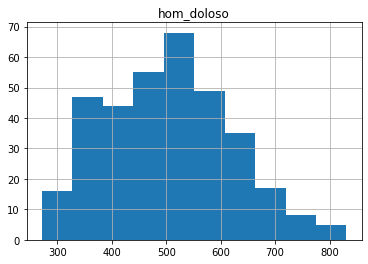

In [ ]:
#plotando histograma sobre os homicios dolosos

df_v.hist('hom_doloso')

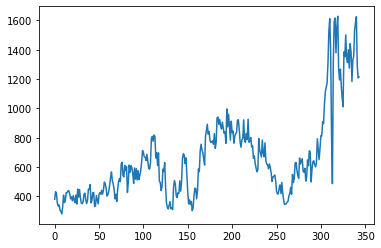

In [ ]:
#plotando grafico de linhas da variável roubo_em_coletivo

rc = df_v['roubo_em_coletivo']


rc.plot()

## Conclusão

Analisando os dados podemos ver que muitos crimes continuam aumentando, sabemos que esse é um assunto extremamente delicado e complexo, pois afeta leis, lentidão em processos judiciais, e um sistema de reclusão não eficiente, impunidade e consecultivamente elevando os índices de criminalidade.